In [3]:
import sys
print(sys.version)


3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [1]:
## dictionary comprehension looping

d = {'a': 0, 'b': 1}
lst1 = [f'key:{k}' for k in d]
lst2 = [f'key:{k}, value:{v}' for k,v in d.items()]

print(lst1)
print(lst2)

['key:a', 'key:b']
['key:a, value:0', 'key:b, value:1']


In [1]:
## merging two dictionaries

d1 = {'a':0,'b':1}
d2 = {'c':2,'d':3}
d3 = {'e':4, 'f':5, 'g':6}
d = {**d1, **d2, **d3}

print(d)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}


In [17]:

from collections import OrderedDict

od = OrderedDict([
    ('first',1)
])

print(od)
od['first'] = 2
print(od)

lst = sum( [i for i in range(3)] )
print(lst)
od3 = OrderedDict( [ (i,i) for i in range(3)] )
print(od3)
print(3+float('Inf'))

OrderedDict([('first', 1)])
OrderedDict([('first', 2)])
3
OrderedDict([(0, 0), (1, 1), (2, 2)])
inf


In [26]:
import pathlib
from pathlib import Path

def make_dirpath_current_datetime_hostname(path=None, comment='', replace_dots=True):
    '''
    make dir string: runs/CURRENT_DATETIME_HOSTNAME
    '''
    import socket
    import os
    from datetime import datetime
    # check if root is a PosixPath object
    if type(path) != pathlib.PosixPath and path is not None:
        path = Path(path)
    current_time = datetime.now().strftime('%b%d_%H-%M-%S')
    log_dir = os.path.join('runs', current_time + '_' + socket.gethostname() + comment)
    log_dir = Path(log_dir)
    print(log_dir._str)
    if replace_dots:
        log_dir = Path(log_dir._str.replace('.','_'))
    if path is not None:
        log_dir = path / log_dir
    return log_dir

print(type(Path('~')) == pathlib.PosixPath)
print()

log_dir = make_dirpath_current_datetime_hostname()
print(log_dir)
log_dir = make_dirpath_current_datetime_hostname('~')
print(log_dir)
log_dir = make_dirpath_current_datetime_hostname('~','_jupyter')
print(log_dir)
log_dir = make_dirpath_current_datetime_hostname('~').expanduser()
print(log_dir)

string = "geeks for geeks geeks geeks geeks" 
# Prints the string by replacing geeks by Geeks  
print( string.replace("geeks", "Geeks") )

log_dir = make_dirpath_current_datetime_hostname('~','_jupyter',True)
print(log_dir)

True



AttributeError: _str

In [2]:
# adding keys to empty dic

d = {}
d['a'] = 3
print(d)

{'a': 3}


In [2]:
# unpack list?

(a,b,c) = [1,2,3]
print(a)

1


In [7]:
## kwargs

def f(*args, **kwargs):
    print(args)
    print(kwargs)

f()
f(1,2,3,a=1,b=2,c=3)

()
{}
(1, 2, 3)
{'a': 1, 'b': 2, 'c': 3}


In [1]:

import json

from pathlib import Path

p = Path('~/')
with open(p) as f:
  data = json.load(f)
  print(data)
  print(data['password'])

NameError: name 'p' is not defined

In [5]:
import subprocess

from subprocess import Popen, PIPE, STDOUT

cmd = 'ls /etc/fstab /etc/non-existent-file'
p = Popen(cmd, shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True)
output = p.stdout.read()
print(output)

b'ls: /etc/fstab: No such file or directory\nls: /etc/non-existent-file: No such file or directory\n'


In [6]:
import sys

print('a')

print(sys.stdout)

a


In [12]:
from pathlib import Path

def send_email(subject, message, destination, password_path=None):
    """ Send an e-mail from with message to destination email.

    NOTE: if you get an error with google gmails you might need to do this: 
    https://stackoverflow.com/questions/16512592/login-credentials-not-working-with-gmail-smtp
    To use an app password:
    https://stackoverflow.com/questions/60975490/how-does-one-send-an-e-mail-from-python-not-using-gmail

    Arguments:
        message {str} -- message string to send.
        destination {str} -- destination email (as string)
    """
    from socket import gethostname
    from email.message import EmailMessage
    import smtplib
    import json
    import sys

    server = smtplib.SMTP('smtp.gmail.com', 587)
    smtplib.stdout = sys.stdout
    server.starttls()
    with open(password_path) as f:
        config = json.load(f)
        server.login('slurm.miranda@gmail.com', config['password'])

        # craft message
        msg = EmailMessage()

        #message = f'{message}\nSend from Hostname: {gethostname()}'
        #msg.set_content(message)
        msg['Subject'] = subject
        msg['From'] = 'slurm.miranda@gmail.com'
        msg['To'] = destination
        # send msg
        server.send_message(msg)

##
print("-------> HELLOWWWWWWWW")
p = Path('~/automl-meta-learning/automl/experiments/pw_app.config.json').expanduser()
send_email(subject='TEST: send_email2', message='MESSAGE', destination='brando.science@gmail.com', password_path=p)

-------> HELLOWWWWWWWW


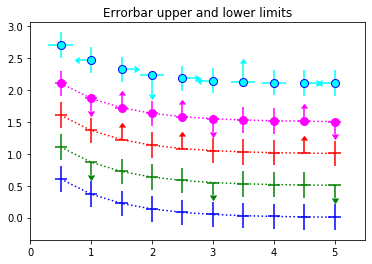

In [2]:
"""
Demo of the errorbar function, including upper and lower limits
"""
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams["errorbar.capsize"] = 3

# https://stackoverflow.com/questions/61415955/why-dont-the-error-limits-in-my-plots-show-in-matplotlib

# example data
x = np.arange(0.5, 5.5, 0.5)
y = np.exp(-x)
xerr = 0.1
yerr = 0.2
ls = 'dotted'

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# standard error bars
plt.errorbar(x, y, xerr=xerr, yerr=yerr, ls=ls, color='blue')

# including upper limits
uplims = np.zeros(x.shape)
uplims[[1, 5, 9]] = True
plt.errorbar(x, y + 0.5, xerr=xerr, yerr=yerr, uplims=uplims, ls=ls,
             color='green')

# including lower limits
lolims = np.zeros(x.shape)
lolims[[2, 4, 8]] = True
plt.errorbar(x, y + 1.0, xerr=xerr, yerr=yerr, lolims=lolims, ls=ls,
             color='red')

# including upper and lower limits
plt.errorbar(x, y + 1.5, marker='o', ms=8, xerr=xerr, yerr=yerr,
             lolims=lolims, uplims=uplims, ls=ls, color='magenta')

# including xlower and xupper limits
xerr = 0.2
yerr = np.zeros(x.shape) + 0.2
yerr[[3, 6]] = 0.3
xlolims = lolims
xuplims = uplims
lolims = np.zeros(x.shape)
uplims = np.zeros(x.shape)
lolims[[6]] = True
uplims[[3]] = True
plt.errorbar(x, y + 2.1, marker='o', ms=8, xerr=xerr, yerr=yerr,
             xlolims=xlolims, xuplims=xuplims, uplims=uplims, lolims=lolims,
             ls='none', mec='blue', capsize=0, color='cyan')

ax.set_xlim((0, 5.5))
ax.set_title('Errorbar upper and lower limits')
plt.show()

In [ ]:
import utils